# CoroBot Kinematics Solver for 6 DOF Manipulator

    This tutorial shows you how to simulate and create a controller for a 6 DOF robotic manipulator. The dimensions and model used in this iPython Notebook is based off of the standard manipulators used on the CoroBot models

# Problem Statement

The problem with kinematics and inverse kinematics is that as a robotic manipulator moves, describing each angle of the joints as well as the the positions of each joint. 

In [4]:
from IPython.display import Image

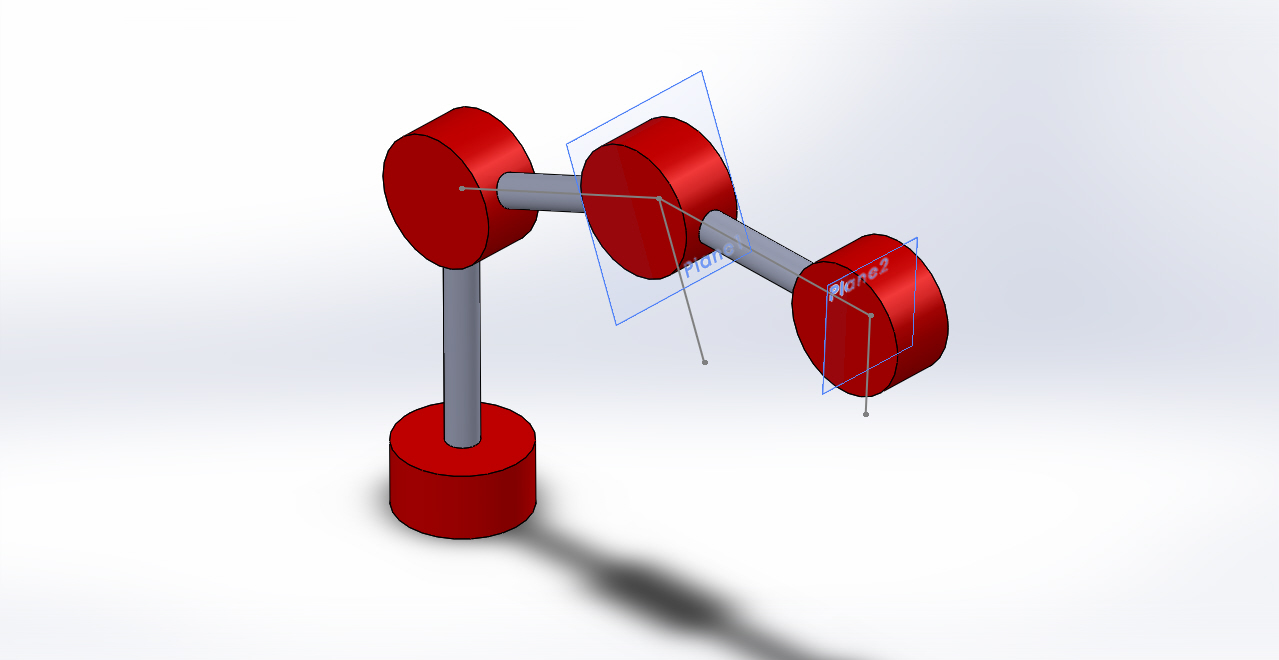

In [5]:
Image('../images/4DOF_ARM.JPG')

# Theory of Kinematics

Insert stuff here

In [4]:
from __future__ import print_function, division #This is incase someone tries to run it in Python2
from sympy import symbols, simplify #CAS used for discussion of math contents
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point #Used for solving geometric  
from sympy.physics.vector import init_vprinting 
init_vprinting(use_latex='mathjax')

## Step One: Define our Reference Frames

In [5]:
Global_Frame = ReferenceFrame('Glob_Framethe base frame')
Base_Frame = ReferenceFrame('B_Frame')
Joint_One_Frame = ReferenceFrame('J1_Frame')
Joint_Two_Frame = ReferenceFrame('J2_Frame')
Joint_Three_Frame = ReferenceFrame('J3_Frame')
Joint_Four_Frame = ReferenceFrame('J4_Frame')
Wrist_Joint_Frame = ReferenceFrame('Wrist_Frame')
Gripper_Frame = ReferenceFrame('Gripper_Frame')

Now we need to specify how the frames are oriented with respect to each other. To do this we need to define the generalized coordinates $\theta_1$, $\theta_2$, $\theta_3$, $\theta_4$, $\theta_5$, $\theta_6$ 

In [6]:
thetab, theta1, theta2, theta3, theta4, theta5 = dynamicsymbols('theta_b, theta1, theta2, theta3, theta4, theta5')

Next we will define the orientation of each of the links relative to the inertial reference frame; or the global coordinate system, as they rotate through various arbitrary angle $\theta_n$

In the next cell we will set the "Base_Frame" position relative to the "Global_Frame" with some rotation "theta1" that rotates about the Z axis.

In [7]:
Base_Frame.orient(Global_Frame, 'Axis', (thetab,Global_Frame.z ))

Now we will calculate the transformation matrix; also called the direction cosine matrix (DCM) relative to the base frame. 

In [8]:
Base_Frame.dcm(Global_Frame)

⎡cos(θ_b)   sin(θ_b)  0⎤
⎢                      ⎥
⎢-sin(θ_b)  cos(θ_b)  0⎥
⎢                      ⎥
⎣    0         0      1⎦

In [9]:
Global_Frame.dcm(Base_Frame)

⎡cos(θ_b)  -sin(θ_b)  0⎤
⎢                      ⎥
⎢sin(θ_b)  cos(θ_b)   0⎥
⎢                      ⎥
⎣   0          0      1⎦

Now we can rotate the arm's base relative to the Global_Frame which is what we will use as the global coordinates

In [10]:
Image('path to second joint rotation')

Next we will calculate the rotational matrix of the first joint relative to the revolute base joint.

In [11]:
Joint_One_Frame.orient(Base_Frame,'Axis',(theta1, Base_Frame.z))

In [12]:
Joint_One_Frame.dcm(Base_Frame)

⎡1     0         0   ⎤
⎢                    ⎥
⎢0  cos(θ₁)   sin(θ₁)⎥
⎢                    ⎥
⎣0  -sin(θ₁)  cos(θ₁)⎦

In [13]:
Joint_Two_Frame.orient(Joint_One_Frame, 'Axis',(theta2, Joint_One_Frame.x))

In [14]:
Joint_Two_Frame.dcm(Base_Frame)

⎡1                  0                                   0                 ⎤
⎢                                                                         ⎥
⎢0  -sin(θ₁)⋅sin(θ₂) + cos(θ₁)⋅cos(θ₂)  sin(θ₁)⋅cos(θ₂) + sin(θ₂)⋅cos(θ₁) ⎥
⎢                                                                         ⎥
⎣0  -sin(θ₁)⋅cos(θ₂) - sin(θ₂)⋅cos(θ₁)  -sin(θ₁)⋅sin(θ₂) + cos(θ₁)⋅cos(θ₂)⎦

As you can see, as we are starting to move away from the base joint, the transformation matricies become quite complicated. To simplyfy this sympy has a `simplify' method that we can use

In [15]:
simplify(Joint_Two_Frame.dcm(Base_Frame))

⎡1        0             0      ⎤
⎢                              ⎥
⎢0  cos(θ₁ + θ₂)   sin(θ₁ + θ₂)⎥
⎢                              ⎥
⎣0  -sin(θ₁ + θ₂)  cos(θ₁ + θ₂)⎦

In [16]:
Joint_Three_Frame.orient(Joint_Two_Frame, 'Axis',(theta3, Joint_Two_Frame.x))

In [25]:
simplify(Joint_Three_Frame.dcm(Global_Frame))

⎡         cos(θ_b)                     sin(θ_b)                    0        ⎤
⎢                                                                           ⎥
⎢-sin(θ_b)⋅cos(θ₁ + θ₂ + θ₃)  cos(θ₁ + θ₂ + θ₃)⋅cos(θ_b)   sin(θ₁ + θ₂ + θ₃)⎥
⎢                                                                           ⎥
⎣sin(θ₁ + θ₂ + θ₃)⋅sin(θ_b)   -sin(θ₁ + θ₂ + θ₃)⋅cos(θ_b)  cos(θ₁ + θ₂ + θ₃)⎦

In [18]:
Joint_Four_Frame.orient(Joint_Three_Frame, 'Axis',(theta4, Joint_Three_Frame.x))

In [27]:
simplify(Joint_Four_Frame.dcm(Global_Frame))

⎡            cos(θ_b)                          sin(θ_b)                       
⎢                                                                             
⎢-sin(θ_b)⋅cos(θ₁ + θ₂ + θ₃ + θ₄)  cos(θ₁ + θ₂ + θ₃ + θ₄)⋅cos(θ_b)   sin(θ₁ + 
⎢                                                                             
⎣sin(θ₁ + θ₂ + θ₃ + θ₄)⋅sin(θ_b)   -sin(θ₁ + θ₂ + θ₃ + θ₄)⋅cos(θ_b)  cos(θ₁ + 

 0           ⎤
             ⎥
θ₂ + θ₃ + θ₄)⎥
             ⎥
θ₂ + θ₃ + θ₄)⎦

In [20]:
Wrist_Joint_Frame.orient(Joint_Four_Frame, 'Axis', (theta5, Joint_Four_Frame.x))

In [28]:
simplify(Wrist_Joint_Frame.dcm(Global_Frame))

⎡              cos(θ_b)                               sin(θ_b)                
⎢                                                                             
⎢-sin(θ_b)⋅cos(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)  cos(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⋅cos(θ_b)  
⎢                                                                             
⎣sin(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⋅sin(θ_b)   -sin(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⋅cos(θ_b) 

              0             ⎤
                            ⎥
 sin(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⎥
                            ⎥
 cos(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⎦

In [22]:
simplify(Wrist_Joint_Frame.dcm(Global_Frame))

⎡              cos(θ_b)                               sin(θ_b)                
⎢                                                                             
⎢-sin(θ_b)⋅cos(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)  cos(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⋅cos(θ_b)  
⎢                                                                             
⎣sin(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⋅sin(θ_b)   -sin(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⋅cos(θ_b) 

              0             ⎤
                            ⎥
 sin(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⎥
                            ⎥
 cos(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⎦

In [23]:
Gripper_Frame.orient(Wrist_Joint_Frame, 'Axis', (theta5, Wrist_Joint_Frame.y))

In [29]:
simplify(Gripper_Frame.dcm(Global_Frame))

⎡-sin(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⋅sin(θ₅)⋅sin(θ_b) + cos(θ₅)⋅cos(θ_b)  sin(θ₁ + θ₂
⎢                                                                             
⎢             -sin(θ_b)⋅cos(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)                           
⎢                                                                             
⎣sin(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⋅sin(θ_b)⋅cos(θ₅) + sin(θ₅)⋅cos(θ_b)   -sin(θ₁ + θ

 + θ₃ + θ₄ + θ₅)⋅sin(θ₅)⋅cos(θ_b) + sin(θ_b)⋅cos(θ₅)   -sin(θ₅)⋅cos(θ₁ + θ₂ + 
                                                                              
   cos(θ₁ + θ₂ + θ₃ + θ₄ + θ₅)⋅cos(θ_b)                    sin(θ₁ + θ₂ + θ₃ + 
                                                                              
₂ + θ₃ + θ₄ + θ₅)⋅cos(θ₅)⋅cos(θ_b) + sin(θ₅)⋅sin(θ_b)  cos(θ₁ + θ₂ + θ₃ + θ₄ +

θ₃ + θ₄ + θ₅)⎤
             ⎥
θ₄ + θ₅)     ⎥
             ⎥
 θ₅)⋅cos(θ₅) ⎦

#Step Two: Define the Limb Lengths

Now that we have our rotational matricies defined. We can now define the lengths of our the limbs.

In [31]:
Limb_One_Length = symbols('L_1')
Limb_Two_Length = symbols('L_2')
Limb_Three_Length = symbols('L_3')
Limb_Four_Length = symbols('L_4')
Limb_Five_Length = symbols('L_5')

Now we define where these joints are relative to the global reference frame.

In [32]:
Base = Point('B')
Base.set_pos(Global_Frame, Limb_One_Length * Base_Frame.z)

TypeError: A Point must be supplied